In [1]:
 %matplotlib inline
import networkx as nx
import itertools
from itertools import combinations
import random
import numpy as np
import matplotlib.pyplot as plt
import time
from scipy.special import comb
from collections import Counter
from itertools import chain
import math
import pandas as pd
import seaborn as sns
import pickle
from google.colab import drive
drive.mount('/content/gdrive')
import seaborn as sns
from sympy.functions.combinatorial.numbers import stirling, bell
from scipy.special import factorial
from sympy import symbols, exp
from scipy.optimize import fsolve

Mounted at /content/gdrive


In [ ]:
b = 11
x = 3
R = 10

In [ ]:
G = nx.Graph()
allPerms = ["".join(seq) for seq in itertools.product("01", repeat=b)]
G.add_nodes_from(allPerms)
start_time = time.time()
Source = allPerms[random.randint(0,2**b-1)]
Dest = allPerms[random.randint(0,2**b-1)]
twoLocs_Source = random.sample(range(b),x)
twoLocs_Dest = random.sample(range(b),x)
allPerms_lengthX_Source = ["".join(seq) for seq in itertools.product("01", repeat=x)]
allPerms_lengthX_Dest = ["".join(seq) for seq in itertools.product("01", repeat=x)]

In [ ]:
G = nx.Graph()
allPerms = ["".join(seq) for seq in itertools.product("01", repeat=b)]
G.add_nodes_from(allPerms)
start_time = time.time()
for i in range(R):
    Source = allPerms[random.randint(0,2**b-1)]
    Dest = allPerms[random.randint(0,2**b-1)]
    twoLocs_Source = random.sample(range(b),x)
    twoLocs_Dest = random.sample(range(b),x)
    allPerms_lengthX_Source = ["".join(seq) for seq in itertools.product("01", repeat=x)]
    allPerms_lengthX_Dest = ["".join(seq) for seq in itertools.product("01", repeat=x)]
    for perms_source in range(2**x):
        for perms_dest in range(2**x):
            s_twos = list(allPerms_lengthX_Source[perms_source])
            d_twos = list(allPerms_lengthX_Dest[perms_dest])
            G.add_edge(''.join([s_twos.pop() if index in twoLocs_Source else bit for index,bit in enumerate(Source)]),''.join([d_twos.pop() if index in twoLocs_Dest else bit for index,bit in enumerate(Dest)]))
            
time.time() - start_time

0.004911661148071289

# Save Numcomp, etc

In [ ]:
b = 8
xRange = range(1,8,1)
repeats = 30;
minR = 2
maxR = 160

In [ ]:
maxLinks = 0.5*2**b*(2**b-1)+2**b
rangeToUse = np.unique([int(i) for i in np.rint(np.logspace(np.log10(minR),np.log10(maxR),50))])
densities = [[] for i in xRange]
conn_comp = [[] for i in xRange]
LCC = [[] for i in xRange]
selfmoment = [[] for i in xRange]
allPerms = ["".join(seq) for seq in itertools.product("01", repeat=b)]

In [ ]:
for j,x in enumerate(list(xRange)):
    print('j = ' + str(j))
    for R in rangeToUse:
        print('R = ' + str(R))
        densities_local = []
        conn_comp_local = []
        LCC_local = []
        selfmoment_local = []
        conn_crit_local = []

        for reps in range(repeats):
            G = nx.Graph()
            G.add_nodes_from(allPerms)
            for i in range(R):
                Source = allPerms[random.randint(0,2**b-1)]
                Dest = allPerms[random.randint(0,2**b-1)]
                twoLocs_Source = random.sample(range(b),x)
                twoLocs_Dest = random.sample(range(b),x)
                allPerms_lengthX_Source = ["".join(seq) for seq in itertools.product("01", repeat=x)]
                allPerms_lengthX_Dest = ["".join(seq) for seq in itertools.product("01", repeat=x)]
                for perms_source in range(2**x):
                    for perms_dest in range(2**x):
                        s_twos = list(allPerms_lengthX_Source[perms_source])
                        d_twos = list(allPerms_lengthX_Dest[perms_dest])
                        G.add_edge(''.join([s_twos.pop() if index in twoLocs_Source else bit for index,bit in enumerate(Source)]),''.join([d_twos.pop() if index in twoLocs_Dest else bit for index,bit in enumerate(Dest)]))
            conn_comp_G = list(nx.connected_components(G))
            conn_comp_local.append(len(conn_comp_G))
            LCC_local.append(len(max(conn_comp_G, key=len)))
            densities_local.append(G.number_of_edges()/maxLinks)
            degrees = list(dict(G.degree()).values())
            DegCounts = Counter(degrees)
            total = sum(DegCounts.values(), 0.0)
            for key in DegCounts:
                DegCounts[key] /= total
            k_net = sum(list(DegCounts.values())*np.array(list(DegCounts.keys()))**2)
            k = G.number_of_edges()/maxLinks*2**b
            selfmoment_local.append(k_net/(k*(k+1)))
            degrees = G.degree()
            to_keep = [n[0] for n in degrees if n[1] != 0]
            conn_comp_G = list(nx.connected_components(G.subgraph(to_keep)))
            conn_crit_local.append(len(conn_comp_G))
        conn_comp_crit[j].append(np.mean(conn_crit_local))
        selfmoment[j].append(np.mean(selfmoment_local))
        conn_comp[j].append(np.mean(conn_comp_local))
        LCC[j].append(np.mean(LCC_local))
        densities[j].append(np.mean(densities_local))

with open('/content/gdrive/My Drive/b8phasePlots', 'wb') as f:
  pickle.dump([selfmoment,conn_comp,LCC,densities,xRange,rangeToUse,conn_comp_crit], f)

j = 0
R = 2
R = 3
R = 4
R = 5
R = 6
R = 7
R = 8
R = 9
R = 10
R = 11
R = 12
R = 13
R = 14
R = 16
R = 17
R = 19
R = 20
R = 22
R = 24
R = 27
R = 29
R = 32
R = 35
R = 38
R = 42
R = 46
R = 50
R = 55
R = 60
R = 65
R = 72
R = 78
R = 86
R = 94
R = 102
R = 112
R = 122
R = 134
R = 146
R = 160
j = 1
R = 2
R = 3
R = 4
R = 5
R = 6
R = 7
R = 8
R = 9
R = 10
R = 11
R = 12
R = 13
R = 14
R = 16
R = 17
R = 19
R = 20
R = 22
R = 24
R = 27
R = 29
R = 32
R = 35
R = 38
R = 42
R = 46
R = 50
R = 55
R = 60
R = 65
R = 72
R = 78
R = 86
R = 94
R = 102
R = 112
R = 122
R = 134
R = 146
R = 160
j = 2
R = 2
R = 3
R = 4
R = 5
R = 6
R = 7
R = 8
R = 9
R = 10
R = 11
R = 12
R = 13
R = 14
R = 16
R = 17
R = 19
R = 20
R = 22
R = 24
R = 27
R = 29
R = 32
R = 35
R = 38
R = 42
R = 46
R = 50
R = 55
R = 60
R = 65
R = 72
R = 78
R = 86
R = 94
R = 102
R = 112
R = 122
R = 134
R = 146
R = 160
j = 3
R = 2
R = 3
R = 4
R = 5
R = 6
R = 7
R = 8
R = 9
R = 10
R = 11
R = 12
R = 13
R = 14
R = 16
R = 17
R = 19
R = 20
R = 22
R = 24
R = 27
R = 29
R =

In [ ]:
with open('/content/gdrive/My Drive/b11phasePlots_resave', 'rb') as f:
    selfmoment,conn_comp,LCC,densities,xRange,rangeToUse,conn_comp_crit = pickle.load(f)
b = 11

In [ ]:
with open('/content/gdrive/My Drive/b10_phasePlots', 'rb') as f:
    selfmoment,conn_comp,LCC,densities,xRange,rangeToUse = pickle.load(f)
b = 10

In [ ]:
R_crit_density = []
R_crit_ruleNum = []
for j,x in enumerate(list(range(1,len(xRange)+2,1))):
  R_crit_density.append(np.log(1-2**(-1*b))/(2*np.log(1-2**(2*(x-b)))))
  R_crit_ruleNum.append(2**((b-x)))

Text(0.5, 0, 'Density')

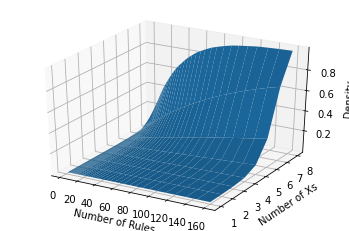

In [ ]:
ax = plt.axes(projection='3d')
X,Y = np.meshgrid(rangeToUse,xRange)
ax.plot_surface(X, Y, np.array(densities))
plt.xlabel('Number of Rules')
plt.ylabel('Number of Xs')
ax.set_zlabel('Density')

In [ ]:
b=11
v2 = []
for e,v in enumerate(LCC):
  nodesPerBC = 2**(e+2)
  v2.append(np.array(v)/nodesPerBC)

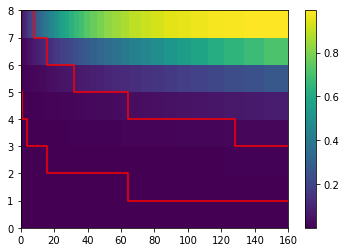

In [ ]:
#plt.imshow(densities)
X,Y = np.meshgrid(np.insert(rangeToUse,0,0),np.insert(xRange,0,0))
#X,Y = np.meshgrid(rangeToUse,xRange)
plt.pcolor(X,Y,np.array(densities))
plt.colorbar()
#plt.ylim(-0.5,7.5)
plt.step(R_crit_ruleNum,np.array(range(len(xRange)+1)),c = 'r')
plt.step(R_crit_density,np.array(range(len(xRange)+1)),c = 'r')
#plt.xticks(list(range(4,40,5)),rangeToUse[4:41:5]);
#plt.yticks(list(range(0,8,3)),list(range(1,9,3)));
plt.xlim((0,160))
plt.ylim((0,max(xRange)))
#plt.xticks(range(8))
plt.show()
#plt.savefig('/content/gdrive/My Drive/degree_5_70.pdf')

Text(0.5, 0, 'LCC')

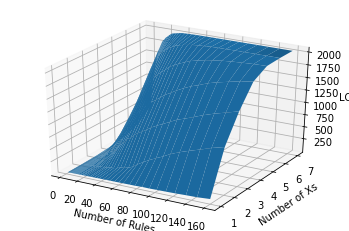

In [ ]:
ax = plt.axes(projection='3d')
X,Y = np.meshgrid(rangeToUse,xRange)
ax.plot_surface(X, Y, np.array(LCC))
plt.xlabel('Number of Rules')
plt.ylabel('Number of Xs')
ax.set_zlabel('LCC')

Text(0.5, 0, 'Connected Components')

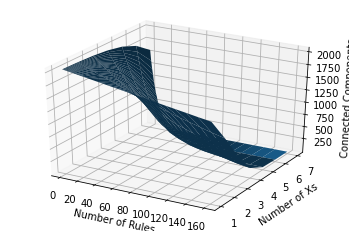

In [ ]:
ax = plt.axes(projection='3d')
X,Y = np.meshgrid(rangeToUse,xRange)
ax.plot_surface(X, Y, np.array(conn_comp))
plt.xlabel('Number of Rules')
plt.ylabel('Number of Xs')
ax.set_zlabel('Connected Components')

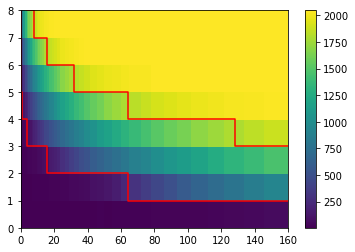

In [ ]:
#plt.imshow(densities)
X,Y = np.meshgrid(np.insert(rangeToUse,0,0),np.insert(xRange,0,0))
#X,Y = np.meshgrid(rangeToUse,xRange)
plt.pcolor(X,Y,np.array(LCC))
plt.colorbar()
#plt.ylim(-0.5,7.5)
plt.step(R_crit_ruleNum,np.array(range(len(xRange)+1)),c = 'r')
plt.step(R_crit_density,np.array(range(len(xRange)+1)),c = 'r')
#plt.xticks(list(range(4,40,5)),rangeToUse[4:41:5]);
#plt.yticks(list(range(0,8,3)),list(range(1,9,3)));
plt.xlim((0,160))
plt.ylim((0,max(xRange)))
#plt.xticks(range(8))
#plt.show()
plt.savefig('/content/gdrive/My Drive/b11LCC.pdf')

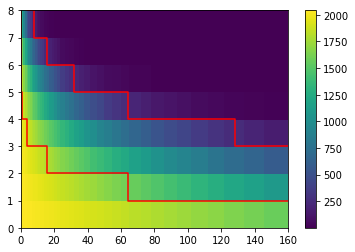

In [ ]:
#plt.imshow(densities)
X,Y = np.meshgrid(np.insert(rangeToUse,0,0),np.insert(xRange,0,0))
#X,Y = np.meshgrid(rangeToUse,xRange)
plt.pcolor(X,Y,np.array(conn_comp))
plt.colorbar()
#plt.ylim(-0.5,7.5)
plt.step(R_crit_ruleNum,np.array(range(len(xRange)+1)),c = 'r')
plt.step(R_crit_density,np.array(range(len(xRange)+1)),c = 'r')
#plt.xticks(list(range(4,40,5)),rangeToUse[4:41:5]);
#plt.yticks(list(range(0,8,3)),list(range(1,9,3)));
plt.xlim((0,160))
plt.ylim((0,max(xRange)))
#plt.xticks(range(8))
#plt.show()
plt.savefig('/content/gdrive/My Drive/nCCb11.pdf')

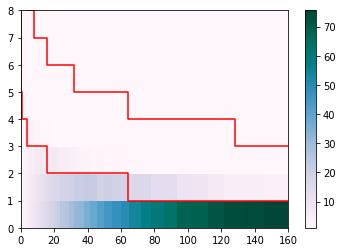

In [ ]:
#plt.imshow(densities)
X,Y = np.meshgrid(np.insert(rangeToUse,0,0),np.insert(xRange,0,0))
#X,Y = np.meshgrid(rangeToUse,xRange)
plt.pcolor(X,Y,np.array(conn_comp_crit))
plt.colorbar()
#plt.ylim(-0.5,7.5)
plt.step(R_crit_ruleNum,np.array(range(len(xRange)+1)),c = 'r')
plt.step(R_crit_density,np.array(range(len(xRange)+1)),c = 'r')
#plt.xticks(list(range(4,40,5)),rangeToUse[4:41:5]);
#plt.yticks(list(range(0,8,3)),list(range(1,9,3)));
plt.xlim((0,160))
plt.ylim((0,max(xRange)))
#plt.xticks(range(8))
#plt.show()
plt.set_cmap('PuBuGn')
#plt.savefig('/content/gdrive/My Drive/nCCCb11.pdf')

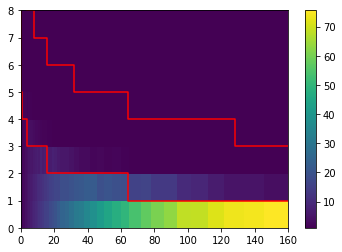

In [ ]:
#plt.imshow(densities)
X,Y = np.meshgrid(np.insert(rangeToUse,0,0),np.insert(xRange,0,0))
#X,Y = np.meshgrid(rangeToUse,xRange)
plt.pcolor(X,Y,np.array(conn_comp_crit))
plt.colorbar()
#plt.ylim(-0.5,7.5)
plt.step(R_crit_ruleNum,np.array(range(len(xRange)+1)),c = 'r')
plt.step(R_crit_density,np.array(range(len(xRange)+1)),c = 'r')
#plt.xticks(list(range(4,40,5)),rangeToUse[4:41:5]);
#plt.yticks(list(range(0,8,3)),list(range(1,9,3)));
plt.xlim((0,160))
plt.ylim((0,max(xRange)))
#plt.xticks(range(8))
plt.show()

## Scaling

Text(0.5, 1.0, '122')

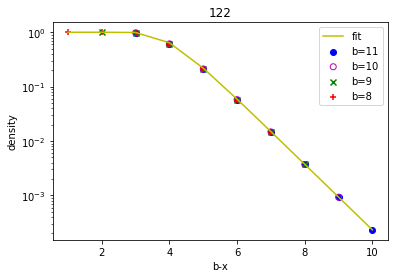

In [ ]:
R = 36
# 23 # R = 38
# 31 # R = 78
# 36 # R = 122

with open('/content/gdrive/My Drive/b11phasePlots_resave', 'rb') as f:
    selfmoment,conn_comp,LCC,densities,xRange,rangeToUse,conn_comp_crit = pickle.load(f)
b = 11
densities = np.transpose(np.array(densities))
plt.scatter(b-np.array(xRange),densities[R],c='b',label='b=11')

with open('/content/gdrive/My Drive/b10_phasePlots', 'rb') as f:
    selfmoment,conn_comp,LCC,densities,xRange,rangeToUse,conn_comp_crit = pickle.load(f)
b = 10
densities = np.transpose(np.array(densities))
plt.scatter(b-np.array(xRange),densities[R], facecolors='none',edgecolors='m',label='b=10')

with open('/content/gdrive/My Drive/b9phasePlots', 'rb') as f:
    selfmoment,conn_comp,LCC,densities,xRange,rangeToUse,conn_comp_crit = pickle.load(f)
b = 9
densities = np.transpose(np.array(densities))
plt.scatter(b-np.array(xRange),densities[R],marker='x',c='g',label='b=9')

with open('/content/gdrive/My Drive/b8phasePlots', 'rb') as f:
    selfmoment,conn_comp,LCC,densities,xRange,rangeToUse,conn_comp_crit = pickle.load(f)
b = 8
densities = np.transpose(np.array(densities))
plt.scatter(b-np.array(xRange),densities[R],marker='+',c='r',label='b=8')

plt.yscale('log')
#plt.plot(range(1,11),R/((2**(np.array(range(1,11)))-1)*2**(np.array(range(1,11)))))
E_poss = (2**(np.array(range(1,11)))-1)*2**(np.array(range(1,11)))/2.
plt.plot(range(1,11),1-((E_poss-1)/(E_poss))**(rangeToUse[R]),c='y',label='fit')
plt.ylabel('density')
plt.xlabel('b-x')
plt.legend()
plt.title(str(rangeToUse[R]))

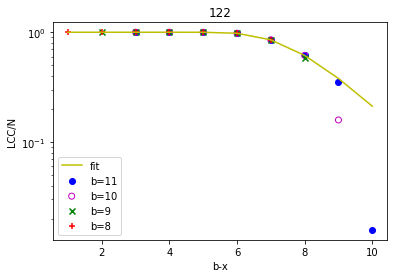

In [ ]:
R = 36
# 23 # R = 38
# 31 # R = 78
# 36 # R = 122

with open('/content/gdrive/My Drive/b11phasePlots_resave', 'rb') as f:
    selfmoment,conn_comp,LCC,densities,xRange,rangeToUse,conn_comp_crit = pickle.load(f)
b = 11
LCC = np.transpose(np.array(LCC))
#plt.scatter(-b+np.array(xRange),LCC[R]/2**b)
plt.scatter(b-np.array(xRange),LCC[R]/2**b,c='b',label='b=11')
#plt.scatter(np.array(xRange)/b,LCC[R]/2**b)

with open('/content/gdrive/My Drive/b10_phasePlots', 'rb') as f:
    selfmoment,conn_comp,LCC,densities,xRange,rangeToUse,conn_comp_crit = pickle.load(f)
b = 10
LCC = np.transpose(np.array(LCC))
plt.scatter(b-np.array(xRange),LCC[R]/2**b, facecolors='none',edgecolors='m',label='b=10')

with open('/content/gdrive/My Drive/b9phasePlots', 'rb') as f:
    selfmoment,conn_comp,LCC,densities,xRange,rangeToUse,conn_comp_crit = pickle.load(f)
b = 9
LCC = np.transpose(np.array(LCC))
plt.scatter(b-np.array(xRange),LCC[R]/2**b,marker='x',c='g',label='b=9')

with open('/content/gdrive/My Drive/b8phasePlots', 'rb') as f:
    selfmoment,conn_comp,LCC,densities,xRange,rangeToUse,conn_comp_crit = pickle.load(f)
b = 8
LCC = np.transpose(np.array(LCC))
plt.scatter(b-np.array(xRange),LCC[R]/2**b,marker='+',c='r',label='b=8')

#with open('/content/gdrive/My Drive/b7phasePlots', 'rb') as f:
#    selfmoment,conn_comp,LCC,densities,xRange,rangeToUse,conn_comp_crit = pickle.load(f)
#b = 7
#LCC = np.transpose(np.array(LCC))
#plt.scatter(b-np.array(xRange),LCC[R]/2**b)

plt.yscale('log')
#plt.plot(-1*np.array(range(1,11)),np.array(range(1,11))/(2**(2*np.array(range(1,11)))))
E_poss = (2**(np.array(range(1,11))))
plt.plot(range(1,11),1-((E_poss-1)/(E_poss))**(2*rangeToUse[R]),c='y',label='fit')
plt.ylabel('LCC/N')
plt.xlabel('b-x')
plt.title(str(rangeToUse[R]))
plt.legend()

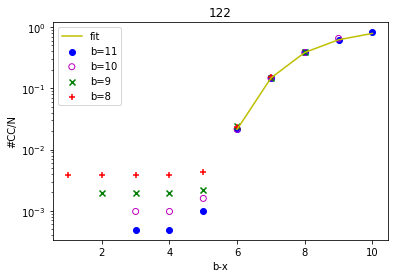

In [ ]:
R = 36
# 23 # R = 38
# 31 # R = 78
# 36 # R = 122

with open('/content/gdrive/My Drive/b11phasePlots_resave', 'rb') as f:
    selfmoment,conn_comp,LCC,densities,xRange,rangeToUse,conn_comp_crit = pickle.load(f)
b = 11
LCC = np.transpose(np.array(conn_comp))
plt.scatter(b-np.array(xRange),LCC[R]/2**b,c='b',label='b=11')

#plt.scatter(np.array(xRange)/b,LCC[R]/2**b)

with open('/content/gdrive/My Drive/b10_phasePlots', 'rb') as f:
    selfmoment,conn_comp,LCC,densities,xRange,rangeToUse,conn_comp_crit = pickle.load(f)
b = 10
LCC = np.transpose(np.array(conn_comp))
plt.scatter(b-np.array(xRange),LCC[R]/2**b, facecolors='none',edgecolors='m',label='b=10')

with open('/content/gdrive/My Drive/b9phasePlots', 'rb') as f:
    selfmoment,conn_comp,LCC,densities,xRange,rangeToUse,conn_comp_crit = pickle.load(f)
b = 9
LCC = np.transpose(np.array(conn_comp))
plt.scatter(b-np.array(xRange),LCC[R]/2**b,marker='x',c='g',label='b=9')

with open('/content/gdrive/My Drive/b8phasePlots', 'rb') as f:
    selfmoment,conn_comp,LCC,densities,xRange,rangeToUse,conn_comp_crit = pickle.load(f)
b = 8
LCC = np.transpose(np.array(conn_comp))
plt.scatter(b-np.array(xRange),LCC[R]/2**b,marker='+',c='r',label='b=8')

# with open('/content/gdrive/My Drive/b7phasePlots', 'rb') as f:
#    selfmoment,conn_comp,LCC,densities,xRange,rangeToUse = pickle.load(f)
# b = 7
# LCC = np.transpose(np.array(conn_comp))
# plt.scatter(b-np.array(xRange),LCC[R]/2**b)

plt.yscale('log')
#plt.xscale('log')
#E_poss = (2**(1+np.array(range(0,11))))
#plt.plot(11-np.array(range(1,12)),1-((E_poss-1)/(E_poss))**(R))
minVal = 6
E_poss = 2**(np.array(range(minVal,11)))
plt.plot(range(minVal,11),((E_poss-1)/(E_poss))**(2*rangeToUse[R]),c='y',label='fit')
plt.ylabel('#CC/N')
plt.xlabel('b-x')
plt.title(str(rangeToUse[R]))
plt.legend()

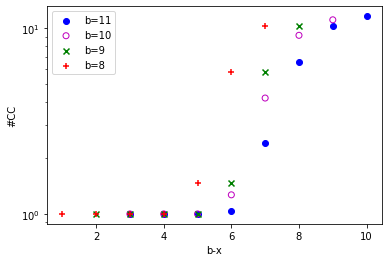

In [ ]:
R = 10

# 23 # R = 38
# 31 # R = 78
# 36 # R = 122

with open('/content/gdrive/My Drive/b11phasePlots_resave', 'rb') as f:
    selfmoment,conn_comp,LCC,densities,xRange,rangeToUse,conn_comp_crit = pickle.load(f)
b = 11
LCC = np.transpose(np.array(conn_comp_crit))
plt.scatter(b-np.array(xRange),LCC[R],c='b',label='b=11')

#plt.scatter(np.array(xRange)/b,LCC[R]/2**b)

with open('/content/gdrive/My Drive/b10_phasePlots', 'rb') as f:
    selfmoment,conn_comp,LCC,densities,xRange,rangeToUse,conn_comp_crit = pickle.load(f)
b = 10
LCC = np.transpose(np.array(conn_comp_crit))
plt.scatter(b-np.array(xRange),LCC[R], facecolors='none',edgecolors='m',label='b=10')


with open('/content/gdrive/My Drive/b9phasePlots', 'rb') as f:
    selfmoment,conn_comp,LCC,densities,xRange,rangeToUse,conn_comp_crit = pickle.load(f)
b = 9
LCC = np.transpose(np.array(conn_comp_crit))
plt.scatter(b-np.array(xRange),LCC[R],marker='x',c='g',label='b=9')


with open('/content/gdrive/My Drive/b8phasePlots', 'rb') as f:
    selfmoment,conn_comp,LCC,densities,xRange,rangeToUse,conn_comp_crit = pickle.load(f)
b = 8
LCC = np.transpose(np.array(conn_comp_crit))
plt.scatter(b-np.array(xRange),LCC[R],marker='+',c='r',label='b=8')
#xCrit = -1*np.log(1-(1-2**(-1*b))**(1/(2*rangeToUse[R])))/2.*np.log(2.)
#plt.axvline(x=xCrit)

#with open('/content/gdrive/My Drive/b7phasePlots', 'rb') as f:
#    selfmoment,conn_comp,LCC,densities,xRange,rangeToUse,conn_comp_crit = pickle.load(f)
#b = 7
#LCC = np.transpose(np.array(conn_comp_crit))
#plt.scatter(b-np.array(xRange),LCC[R]/2**b)

plt.yscale('log')
#plt.xscale('log')
#E_poss = (2**(1+np.array(range(0,11))))
#plt.plot(11-np.array(range(1,12)),1-((E_poss-1)/(E_poss))**(R))
E_poss = 2**(np.array(range(3,11)))
#plt.plot(range(3,11),((E_poss-1)/(E_poss))**(2*R))
plt.ylabel('#CC')
plt.xlabel('b-x')
plt.legend()

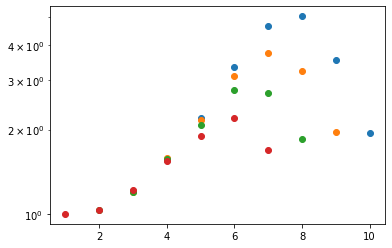

In [ ]:
R = 10

with open('/content/gdrive/My Drive/b11phasePlots_resave', 'rb') as f:
    selfmoment,conn_comp,LCC,densities,xRange,rangeToUse = pickle.load(f)
b = 11
LCC = np.transpose(np.array(selfmoment))
plt.scatter(b-np.array(xRange),LCC[R])
#plt.scatter(np.array(xRange)/b,LCC[R]/2**b)

with open('/content/gdrive/My Drive/b10_phasePlots', 'rb') as f:
    selfmoment,conn_comp,LCC,densities,xRange,rangeToUse = pickle.load(f)
b = 10
LCC = np.transpose(np.array(selfmoment))
plt.scatter(b-np.array(xRange),LCC[R])

with open('/content/gdrive/My Drive/b9phasePlots', 'rb') as f:
    selfmoment,conn_comp,LCC,densities,xRange,rangeToUse = pickle.load(f)
b = 9
LCC = np.transpose(np.array(selfmoment))
plt.scatter(b-np.array(xRange),LCC[R])

with open('/content/gdrive/My Drive/b8phasePlots', 'rb') as f:
    selfmoment,conn_comp,LCC,densities,xRange,rangeToUse = pickle.load(f)
b = 8
LCC = np.transpose(np.array(selfmoment))
plt.scatter(b-np.array(xRange),LCC[R])

plt.yscale('log')

# Resave numComp

In [ ]:
b = 11
xRange_local = range(8,9,1)
repeats = 30;
minR = 2
maxR = 160

In [ ]:
with open('/content/gdrive/My Drive/b11phasePlots', 'rb') as f:
    selfmoment,conn_comp,LCC,densities,xRange,rangeToUse = pickle.load(f)
maxLinks = 0.5*2**b*(2**b-1)+2**b
rangeToUse = np.unique([int(i) for i in np.rint(np.logspace(np.log10(minR),np.log10(maxR),50))])
densities = [[] for i in xRange]
conn_comp = [[] for i in xRange]
LCC = [[] for i in xRange]
selfmoment = [[] for i in xRange]
allPerms = ["".join(seq) for seq in itertools.product("01", repeat=b)]

In [ ]:
with open('/content/gdrive/My Drive/b11phasePlots', 'rb') as f:
    selfmoment,conn_comp,LCC,densities,xRange,rangeToUse = pickle.load(f)

densities.append([])
conn_comp.append([])
LCC.append([])
selfmoment.append([])

for j,x in enumerate(list(xRange_local)):
    print('j = ' + str(j))
    for R in rangeToUse:
        print('R = ' + str(R))
        densities_local = []
        conn_comp_local = []
        LCC_local = []
        selfmoment_local = []

        for reps in range(repeats):
            G = nx.Graph()
            G.add_nodes_from(allPerms)
            for i in range(R):
                Source = allPerms[random.randint(0,2**b-1)]
                Dest = allPerms[random.randint(0,2**b-1)]
                twoLocs_Source = random.sample(range(b),x)
                twoLocs_Dest = random.sample(range(b),x)
                allPerms_lengthX_Source = ["".join(seq) for seq in itertools.product("01", repeat=x)]
                allPerms_lengthX_Dest = ["".join(seq) for seq in itertools.product("01", repeat=x)]
                for perms_source in range(2**x):
                    for perms_dest in range(2**x):
                        s_twos = list(allPerms_lengthX_Source[perms_source])
                        d_twos = list(allPerms_lengthX_Dest[perms_dest])
                        G.add_edge(''.join([s_twos.pop() if index in twoLocs_Source else bit for index,bit in enumerate(Source)]),''.join([d_twos.pop() if index in twoLocs_Dest else bit for index,bit in enumerate(Dest)]))
            conn_comp_G = list(nx.connected_components(G))
            conn_comp_local.append(len(conn_comp_G))
            LCC_local.append(len(max(conn_comp_G, key=len)))
            densities_local.append(G.number_of_edges()/maxLinks)
            degrees = list(dict(G.degree()).values())
            DegCounts = Counter(degrees)
            total = sum(DegCounts.values(), 0.0)
            for key in DegCounts:
                DegCounts[key] /= total
            k_net = sum(list(DegCounts.values())*np.array(list(DegCounts.keys()))**2)
            k = G.number_of_edges()/maxLinks*2**b
            selfmoment_local.append(k_net/(k*(k+1)))
        selfmoment[x-1].append(np.mean(selfmoment_local))
        conn_comp[x-1].append(np.mean(conn_comp_local))
        LCC[x-1].append(np.mean(LCC_local))
        densities[x-1].append(np.mean(densities_local))
xRange = range(1,9,1)
with open('/content/gdrive/My Drive/b11phasePlots_resave', 'wb') as f:
  pickle.dump([selfmoment,conn_comp,LCC,densities,xRange,rangeToUse], f)

j = 0
R = 2
R = 3
R = 4
R = 5
R = 6
R = 7
R = 8
R = 9
R = 10
R = 11
R = 12
R = 13
R = 14
R = 16
R = 17
R = 19
R = 20
R = 22
R = 24
R = 27
R = 29
R = 32
R = 35
R = 38
R = 42
R = 46
R = 50
R = 55
R = 60
R = 65
R = 72
R = 78
R = 86
R = 94
R = 102
R = 112
R = 122
R = 134
R = 146
R = 160


# Save altered CC

In [ ]:
b = 11
xRange = range(1,8,1)
repeats = 30;
minR = 2
maxR = 160

maxLinks = 0.5*2**b*(2**b-1)+2**b
rangeToUse = np.unique([int(i) for i in np.rint(np.logspace(np.log10(minR),np.log10(maxR),50))])
conn_comp_crit = [[] for i in xRange]
allPerms = ["".join(seq) for seq in itertools.product("01", repeat=b)]

for j,x in enumerate(list(xRange)):
    print('j = ' + str(j))
    for R in rangeToUse:
        print('R = ' + str(R))
        densities_local = []
        conn_comp_local = []
        LCC_local = []
        selfmoment_local = []

        for reps in range(repeats):
            G = nx.Graph()
            G.add_nodes_from(allPerms)
            for i in range(R):
                Source = allPerms[random.randint(0,2**b-1)]
                Dest = allPerms[random.randint(0,2**b-1)]
                twoLocs_Source = random.sample(range(b),x)
                twoLocs_Dest = random.sample(range(b),x)
                allPerms_lengthX_Source = ["".join(seq) for seq in itertools.product("01", repeat=x)]
                allPerms_lengthX_Dest = ["".join(seq) for seq in itertools.product("01", repeat=x)]
                for perms_source in range(2**x):
                    for perms_dest in range(2**x):
                        s_twos = list(allPerms_lengthX_Source[perms_source])
                        d_twos = list(allPerms_lengthX_Dest[perms_dest])
                        G.add_edge(''.join([s_twos.pop() if index in twoLocs_Source else bit for index,bit in enumerate(Source)]),''.join([d_twos.pop() if index in twoLocs_Dest else bit for index,bit in enumerate(Dest)]))          
            degrees = G.degree()
            to_keep = [n[0] for n in degrees if n[1] != 0]
            conn_comp_G = list(nx.connected_components(G.subgraph(to_keep)))
            conn_comp_local.append(len(conn_comp_G))
        conn_comp_crit[j].append(np.mean(conn_comp_local))

with open('/content/gdrive/My Drive/b11phasePlots_resave', 'rb') as f:
  selfmoment,conn_comp,LCC,densities,xRange,rangeToUse = pickle.load(f)
with open('/content/gdrive/My Drive/b11phasePlots_resave', 'wb') as f:
  pickle.dump([selfmoment,conn_comp,LCC,densities,xRange,rangeToUse,conn_comp_crit], f)

b = 11
xRange_local = range(8,9,1)
repeats = 30;
minR = 2
maxR = 160

maxLinks = 0.5*2**b*(2**b-1)+2**b
rangeToUse = np.unique([int(i) for i in np.rint(np.logspace(np.log10(minR),np.log10(maxR),50))])
allPerms = ["".join(seq) for seq in itertools.product("01", repeat=b)]

for j,x in enumerate(list(xRange_local)):
    print('j = ' + str(j))
    for R in rangeToUse:
        print('R = ' + str(R))
        densities_local = []
        conn_comp_local = []
        LCC_local = []
        selfmoment_local = []

        for reps in range(repeats):
            G = nx.Graph()
            G.add_nodes_from(allPerms)
            for i in range(R):
                Source = allPerms[random.randint(0,2**b-1)]
                Dest = allPerms[random.randint(0,2**b-1)]
                twoLocs_Source = random.sample(range(b),x)
                twoLocs_Dest = random.sample(range(b),x)
                allPerms_lengthX_Source = ["".join(seq) for seq in itertools.product("01", repeat=x)]
                allPerms_lengthX_Dest = ["".join(seq) for seq in itertools.product("01", repeat=x)]
                for perms_source in range(2**x):
                    for perms_dest in range(2**x):
                        s_twos = list(allPerms_lengthX_Source[perms_source])
                        d_twos = list(allPerms_lengthX_Dest[perms_dest])
                        G.add_edge(''.join([s_twos.pop() if index in twoLocs_Source else bit for index,bit in enumerate(Source)]),''.join([d_twos.pop() if index in twoLocs_Dest else bit for index,bit in enumerate(Dest)]))          
            degrees = G.degree()
            to_keep = [n[0] for n in degrees if n[1] != 0]
            conn_comp_G = list(nx.connected_components(G.subgraph(to_keep)))
            conn_comp_local.append(len(conn_comp_G))
        conn_comp_crit[j].append(np.mean(conn_comp_local))

xRange = range(1,9,1)
with open('/content/gdrive/My Drive/b11phasePlots_resave', 'wb') as f:
  pickle.dump([selfmoment,conn_comp,LCC,densities,xRange,rangeToUse,conn_comp_crit], f)

# Degree Distribution

In [ ]:
DegCounts = []
b = 11
x = 5
R = 70
del DegCounts
for rep in range(100):
  G = nx.Graph()
  allPerms = ["".join(seq) for seq in itertools.product("01", repeat=b)]
  G.add_nodes_from(allPerms)
  start_time = time.time()
  for i in range(R):
      Source = allPerms[random.randint(0,2**b-1)]
      Dest = allPerms[random.randint(0,2**b-1)]
      twoLocs_Source = random.sample(range(b),x)
      twoLocs_Dest = random.sample(range(b),x)
      allPerms_lengthX_Source = ["".join(seq) for seq in itertools.product("01", repeat=x)]
      allPerms_lengthX_Dest = ["".join(seq) for seq in itertools.product("01", repeat=x)]
      for perms_source in range(2**x):
          for perms_dest in range(2**x):
              s_twos = list(allPerms_lengthX_Source[perms_source])
              d_twos = list(allPerms_lengthX_Dest[perms_dest])
              G.add_edge(''.join([s_twos.pop() if index in twoLocs_Source else bit for index,bit in enumerate(Source)]),''.join([d_twos.pop() if index in twoLocs_Dest else bit for index,bit in enumerate(Dest)]))
              
  time.time() - start_time
  degrees = list(dict(G.degree()).values())
  if 'DegCounts' in locals():
    DegCounts =DegCounts+ Counter(degrees)
  else:
    DegCounts = Counter(degrees)
total = sum(DegCounts.values(), 0.0)
for key in DegCounts:
    DegCounts[key] /= total

In [ ]:
#slow
analysis_lim = 2**b
R_eff = 2*R
k_prob_analytics_slow = []
for k in range(max(DegCounts)):
    p_ri = []
    p_k_given_ri = []

    for R_i in range(1,R_eff+1):
        p_ri.append(np.exp(np.sum(np.log(np.arange(1,R_eff+1)))-sum(np.log(np.arange(1,R_i+1)))-sum(np.log(np.arange(1,(R_eff-R_i+1))))+R_i*np.log(2**(x-b))+(R_eff-R_i)*np.log(1-2**(x-b))))
        p_k_given_ri.append(np.exp(np.sum(np.log(np.arange(1,2**b+1)))-np.sum(np.log(np.arange(1,k+1)))-np.sum(np.log(np.arange(1,2**b-k+1)))+k*np.log(1-(1-2**(x-b))**(R_i))+(R_i*(2**b-k))*np.log(1-2**(x-b))))


    k_prob_analytics_slow.append(sum(np.array(p_ri)*np.array(p_k_given_ri)))
k_prob_analytics_slow[0] = (1-2**((x-b)))**(2*R)

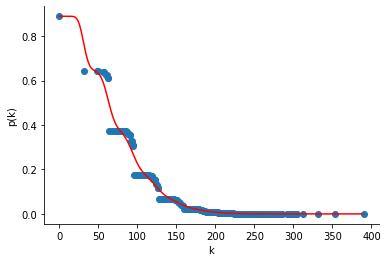

In [ ]:
keys = sorted(DegCounts.keys(), reverse=False)
result = []
for key in keys:
    result.append(DegCounts[key])
ax = plt.subplot(1,1,1)
plt.scatter(keys,1-np.cumsum(result))

plt.plot(range(max(DegCounts)),1-np.cumsum(k_prob_analytics_slow),c='r')
#plt.plot(est_degs,1-np.cumsum(degrees_probs),c='r')
#ax.set(ylabel = 'p(k)', xlabel = 'k', ylim = [-0.05,1.4*max(DegCounts.values())])
#plt.xlim((-0.5,2**x))
ax.set(ylabel = 'p(k)', xlabel = 'k')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig('/content/gdrive/My Drive/degree_5_70.pdf')

# Density

In [ ]:
b = 12
xRange = range(2,7,2)
repeats = 20;
minR = 100
maxR = 700
spacing = 40

In [ ]:
maxLinks = 0.5*2**b*(2**b-1)+2**b
rangeToUse = [int(i) for i in np.rint(np.logspace(np.log10(minR),np.log10(maxR),30))]
densities = [[] for i in xRange]
exp_densities = [[] for i in xRange]
allPerms = ["".join(seq) for seq in itertools.product("01", repeat=b)]

In [ ]:
for j,x in enumerate(list(xRange)):
    print('j = ' + str(j))
    for R in rangeToUse:
        print('R = ' + str(R))
        densities_local = []
        exp_densities[j].append(1-(1-2**(2*(x-b)))**(2*R))

        for reps in range(repeats):
            G = nx.Graph()
            G.add_nodes_from(allPerms)
            for i in range(R):
                Source = allPerms[random.randint(0,2**b-1)]
                Dest = allPerms[random.randint(0,2**b-1)]
                twoLocs_Source = random.sample(range(b),x)
                twoLocs_Dest = random.sample(range(b),x)
                allPerms_lengthX_Source = ["".join(seq) for seq in itertools.product("01", repeat=x)]
                allPerms_lengthX_Dest = ["".join(seq) for seq in itertools.product("01", repeat=x)]
                for perms_source in range(2**x):
                    for perms_dest in range(2**x):
                        s_twos = list(allPerms_lengthX_Source[perms_source])
                        d_twos = list(allPerms_lengthX_Dest[perms_dest])
                        G.add_edge(''.join([s_twos.pop() if index in twoLocs_Source else bit for index,bit in enumerate(Source)]),''.join([d_twos.pop() if index in twoLocs_Dest else bit for index,bit in enumerate(Dest)]))

            densities_local.append(G.number_of_edges()/maxLinks)
        densities[j].append(np.mean(densities_local))

j = 0
R = 100
R = 107
R = 114
R = 122
R = 131
R = 140
R = 150
R = 160
R = 171
R = 183
R = 196
R = 209
R = 224
R = 239
R = 256
R = 274
R = 293
R = 313
R = 335
R = 358
R = 383
R = 409
R = 438
R = 468
R = 500
R = 535
R = 572
R = 612
R = 655
R = 700
j = 1
R = 100
R = 107
R = 114
R = 122
R = 131
R = 140
R = 150
R = 160
R = 171
R = 183
R = 196
R = 209
R = 224
R = 239
R = 256
R = 274
R = 293
R = 313
R = 335
R = 358
R = 383
R = 409
R = 438
R = 468
R = 500
R = 535
R = 572
R = 612
R = 655
R = 700
j = 2
R = 100
R = 107
R = 114
R = 122
R = 131
R = 140
R = 150
R = 160
R = 171
R = 183
R = 196
R = 209
R = 224
R = 239
R = 256
R = 274
R = 293
R = 313
R = 335
R = 358
R = 383
R = 409
R = 438
R = 468
R = 500
R = 535
R = 572
R = 612
R = 655
R = 700


In [ ]:
plt.scatter(list(rangeToUse),densities,label = 'x = 6')
plt.plot(list(rangeToUse),exp_densities,'r',linewidth = 2.5)
plt.ylabel('Density')
plt.legend(loc = 'upper left')
plt.xlabel('Number of Rules')

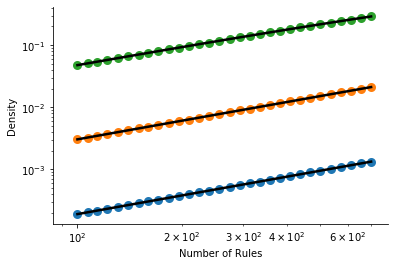

In [ ]:
ax = plt.subplot(111)

for j,x in enumerate(list(xRange)):
    ax.scatter(list(rangeToUse),densities[j],label = 'x = '+ str(x),LineWidth = 3)
    ax.plot(list(rangeToUse),exp_densities[j],'k',linewidth = 2.5)
ax.set(ylabel = 'Density', xlabel = 'Number of Rules',yscale = 'log',xscale = 'log')
#ax.ylabel('Density')
#plt.legend(loc = 'upper left')
#ax.xlabel('Number of Rules')
#ax.yscale('log')
#ax.xscale('log')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig('Fix_X_Density.pdf')

# Analytic Density

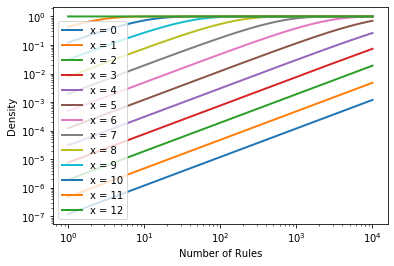

In [ ]:
# Fix b and increase x and R

b = 12
XRange = range(0,13)
R_Range = range(1,10000)
G_DensStorer = [[] for i in range(len(XRange))]

for x in XRange:
    for R in R_Range:
        G_DensStorer[x-1].append(1-(1-2**(2*(x-b)))**(2*R))

for x in XRange:
    plt.plot(R_Range,G_DensStorer[x-1], linewidth=2, label='x = ' + str(x))
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of Rules');
plt.ylabel('Density');
plt.legend()

# Robustness

## Random Attack

In [ ]:
# RANDOM ATTACKS

rand_giant_comps_tot = []
giant_comp_size_tot = []
graph_sizes = []

repnum = 100
z = plt.subplot(1,1,1)

for rep in range(repnum):
  start_time = time.time()

  # Redo Graphs at each time point?

  b = 11
  x = 3
  R = 15


  G = nx.Graph()
  allPerms = ["".join(seq) for seq in itertools.product("01", repeat=b)]
  #G.add_nodes_from(allPerms)
  start_time = time.time()
  for i in range(R):
      Source = allPerms[random.randint(0,2**b-1)]
      Dest = allPerms[random.randint(0,2**b-1)]
      twoLocs_Source = random.sample(range(b),x)
      twoLocs_Dest = random.sample(range(b),x)
      allPerms_lengthX_Source = ["".join(seq) for seq in itertools.product("01", repeat=x)]
      allPerms_lengthX_Dest = ["".join(seq) for seq in itertools.product("01", repeat=x)]
      for perms_source in range(2**x):
          for perms_dest in range(2**x):
              s_twos = list(allPerms_lengthX_Source[perms_source])
              d_twos = list(allPerms_lengthX_Dest[perms_dest])
              G.add_edge(''.join([s_twos.pop() if index in twoLocs_Source else bit for index,bit in enumerate(Source)]),''.join([d_twos.pop() if index in twoLocs_Dest else bit for index,bit in enumerate(Dest)]))
              
  time.time() - start_time
  G_rand = nx.gnm_random_graph(G.number_of_nodes(), G.number_of_edges())
  # End of experiment

  #rand_giant_comps = []
  #giant_comp_size = []
  rand_giant_comps = [0]*(2**b)
  giant_comp_size = [0]*(2**b)

  Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
  G_breakdown = G.subgraph(Gcc[0]).copy() 
  Gcc = sorted(nx.connected_components(G_rand), key=len, reverse=True)
  G_rand_breakdown = G_rand.subgraph(Gcc[0]).copy()

  init_size = G_breakdown.number_of_nodes()
  graph_sizes.append(init_size)

  rand_nodes_available = list(G_rand_breakdown.nodes())
  nodes_available = list(G_breakdown.nodes())

  initial_rand_nodes = len(rand_nodes_available)
  initial_nodes = len(nodes_available)

  #rand_giant_comps.append(len(max(list(nx.connected_components(G_rand_breakdown)), key=len))/len(rand_nodes_available))
  #giant_comp_size.append(len(max(list(nx.connected_components(G_breakdown)), key=len))/len(nodes_available))
  rand_giant_comps[0] = len(max(list(nx.connected_components(G_rand_breakdown)), key=len))/initial_rand_nodes
  giant_comp_size[0] = len(max(list(nx.connected_components(G_breakdown)), key=len))/initial_nodes

  for i in range(1,(init_size)):
    which_remove = random.choice(nodes_available)
    nodes_available.remove(which_remove)
    G_breakdown.remove_node(which_remove)
    which_remove = random.choice(rand_nodes_available)
    rand_nodes_available.remove(which_remove)
    G_rand_breakdown.remove_node(which_remove)
    if i%1 == 0:
      giant_comp_size[i] = len(max(list(nx.connected_components(G_breakdown)), key=len))/initial_nodes
      rand_giant_comps[i] = len(max(list(nx.connected_components(G_rand_breakdown)), key=len))/initial_rand_nodes
      #giant_comp_size.append(len(max(list(nx.connected_components(G_breakdown)), key=len))/len(nodes_available))
      #rand_giant_comps.append(len(max(list(nx.connected_components(G_rand_breakdown)), key=len))/len(rand_nodes_available))
  rand_giant_comps_tot.append(rand_giant_comps)
  giant_comp_size_tot.append(giant_comp_size)
  plt.plot(np.array(range(0,initial_rand_nodes,1))/initial_rand_nodes,np.array(rand_giant_comps_tot[rep][0:initial_rand_nodes]),color = (241./255,158./255,57./255)) # ER is Orange
  plt.plot(np.array(range(0,initial_nodes,1))/initial_nodes,np.array(giant_comp_size_tot[rep][0:initial_nodes]),color = (51./255,50./255,246./255)) # RG is blue
  if rep % 10 == 0:
    print(time.time() - start_time)


#z.set_yticklabels([])
z.set_xticklabels([])
z.set_yticks([0,0.5,1])
z.set_xticks([0,0.5,1])
z.spines['top'].set_visible(False)
z.spines['right'].set_visible(False)

plt.savefig('/content/gdrive/My Drive/SI_top_left.pdf')

## Targeted Attack

1.7250914573669434
1.4838318824768066
1.3198912143707275
1.3823702335357666
1.4396779537200928
1.4569275379180908
1.4303491115570068
1.426893711090088
1.5251328945159912
1.4082531929016113


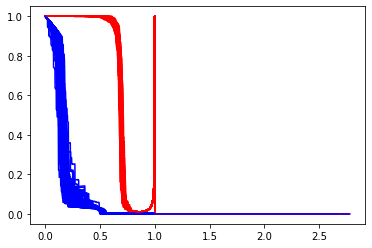

In [ ]:
# Targeted Attack

rand_giant_comps_tot = []
giant_comp_size_tot = []
graph_sizes = []
repnum = 100
z = plt.subplot(1,1,1)
for rep in range(repnum):
  start_time = time.time()

  # Test whether we need to reinitialize graph!
  b = 11
  x = 3
  R = 15


  G = nx.Graph()
  allPerms = ["".join(seq) for seq in itertools.product("01", repeat=b)]
  #G.add_nodes_from(allPerms)
  start_time = time.time()
  for i in range(R):
      Source = allPerms[random.randint(0,2**b-1)]
      Dest = allPerms[random.randint(0,2**b-1)]
      twoLocs_Source = random.sample(range(b),x)
      twoLocs_Dest = random.sample(range(b),x)
      allPerms_lengthX_Source = ["".join(seq) for seq in itertools.product("01", repeat=x)]
      allPerms_lengthX_Dest = ["".join(seq) for seq in itertools.product("01", repeat=x)]
      for perms_source in range(2**x):
          for perms_dest in range(2**x):
              s_twos = list(allPerms_lengthX_Source[perms_source])
              d_twos = list(allPerms_lengthX_Dest[perms_dest])
              G.add_edge(''.join([s_twos.pop() if index in twoLocs_Source else bit for index,bit in enumerate(Source)]),''.join([d_twos.pop() if index in twoLocs_Dest else bit for index,bit in enumerate(Dest)]))
              
  time.time() - start_time
  G_rand = nx.gnm_random_graph(G.number_of_nodes(), G.number_of_edges())
  # End of test

  rand_giant_comps = [0]*(2**b)
  giant_comp_size = [0]*(2**b)

  Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
  G_breakdown = G.subgraph(Gcc[0]).copy() 
  Gcc = sorted(nx.connected_components(G_rand), key=len, reverse=True)
  G_rand_breakdown = G_rand.subgraph(Gcc[0]).copy()

  init_size = G_breakdown.number_of_nodes()
  graph_sizes.append(init_size)

  rand_nodes_available = list(G_rand_breakdown.nodes())
  nodes_available = list(G_breakdown.nodes())

  initial_rand_nodes = len(rand_nodes_available)
  initial_nodes = len(nodes_available)

  #rand_giant_comps.append(len(max(list(nx.connected_components(G_rand_breakdown)), key=len)))
  #giant_comp_size.append(len(max(list(nx.connected_components(G_breakdown)), key=len)))
  rand_giant_comps[0] = len(max(list(nx.connected_components(G_rand_breakdown)), key=len))/initial_rand_nodes
  giant_comp_size[0] = len(max(list(nx.connected_components(G_breakdown)), key=len))/initial_nodes

  for i in range(1,init_size):
    degree_dict = dict(G_breakdown.degree())
    max_val = max(degree_dict.values())
    which_remove = random.choice([key for key in degree_dict if degree_dict[key] == max_val])
    nodes_available.remove(which_remove)
    G_breakdown.remove_node(which_remove)
    degree_dict = dict(G_rand_breakdown.degree())
    max_val = max(degree_dict.values())
    which_remove = random.choice([key for key in degree_dict if degree_dict[key] == max_val])
    rand_nodes_available.remove(which_remove)
    G_rand_breakdown.remove_node(which_remove)
    if i%1 == 0:
      giant_comp_size[i] = len(max(list(nx.connected_components(G_breakdown)), key=len))/initial_nodes
      rand_giant_comps[i] = len(max(list(nx.connected_components(G_rand_breakdown)), key=len))/initial_rand_nodes
      #giant_comp_size.append(len(max(list(nx.connected_components(G_breakdown)), key=len))/len(nodes_available))
      #rand_giant_comps.append(len(max(list(nx.connected_components(G_rand_breakdown)), key=len))/len(rand_nodes_available))
  rand_giant_comps_tot.append(rand_giant_comps)
  giant_comp_size_tot.append(giant_comp_size)
  plt.plot(np.array(range(0,initial_rand_nodes,1))/initial_rand_nodes,np.array(rand_giant_comps_tot[rep][0:initial_rand_nodes]),color = (241./255,158./255,57./255))
  plt.plot(np.array(range(0,initial_nodes,1))/initial_nodes,np.array(giant_comp_size_tot[rep][0:initial_nodes]),color = (51./255,50./255,246./255))
  if rep % 10 == 0:
    print(time.time() - start_time)
  
#z.set_yticklabels([])
#z.set_xticklabels([])
z.set_yticks([0,0.5,1])
z.set_xticks([0,0.5,1])

z.spines['top'].set_visible(False)
z.spines['right'].set_visible(False)

plt.savefig('/content/gdrive/My Drive/SI_bottom_left.pdf')

# Visualization for Overlap

In [ ]:
b = 7
x = 4
R = 2

In [ ]:
G = nx.Graph()
allPerms_lengthX = ["".join(seq) for seq in itertools.product("01", repeat=x)]
start_time = time.time()
Sources = ['1010000','1010000']
Source_ZeroLoc = [3,4,5,6]
Dests = ['010000000','010000000']
Dest_ZeroLoc = [[3,4,7,8],[5,6,7,8]]
for i in range(R):
    Source = Sources[i]
    Dest = Dests[i]
    twoLocs_Dest = Dest_ZeroLoc[i]
    for perms_source in range(2**x):
        for perms_dest in range(2**x):
            s_twos = list(allPerms_lengthX[perms_source])
            d_twos = list(allPerms_lengthX[perms_dest])
            G.add_edge(''.join([s_twos.pop() if index in Source_ZeroLoc else bit for index,bit in enumerate(Source)]),''.join([d_twos.pop() if index in twoLocs_Dest else bit for index,bit in enumerate(Dest)]),label = str(i))

i = 2
twoLocs_Dest = [7,8]
allPerms_length2 = ["".join(seq) for seq in itertools.product("01", repeat=2)]
for perms_source in range(2**x):
        for perms_dest in range(2**2):
            s_twos = list(allPerms_lengthX[perms_source])
            d_twos = list(allPerms_length2[perms_dest])
            G.add_edge(''.join([s_twos.pop() if index in Source_ZeroLoc else bit for index,bit in enumerate(Source)]),''.join([d_twos.pop() if index in twoLocs_Dest else bit for index,bit in enumerate(Dest)]),label = str(i))


time.time() - start_time

0.0037665367126464844

In [ ]:
perms_dest

3

In [ ]:
len(G.nodes)

44

In [ ]:
allPerms_lengthX[perms_dest]

'0011'

In [ ]:
d = nx.get_edge_attributes(G,'label')
counts = Counter(chain.from_iterable(d[e] for e in d))
counts

Counter({'0': 192, '1': 192, '2': 64})

In [ ]:
nx.write_edgelist(G,'/content/gdrive/My Drive/Overlap.csv')

# Homophily Heuristic

In [ ]:
b = 7
x = 1
G = nx.Graph()
allPerms = ["".join(seq) for seq in itertools.product("01", repeat=b)]
G.add_nodes_from(allPerms)
start_time = time.time()
ZeroLocs = list(itertools.combinations(list(range(b)),x))
allPerms_lengthX = ["".join(seq) for seq in itertools.product("01", repeat=x)]
allPerms_lengthBMinusX = ["".join(seq) for seq in itertools.product("01", repeat=b-x)]

for i in range(len(allPerms_lengthBMinusX)):
  for j in range(len(ZeroLocs)):
    Source = allPerms_lengthBMinusX[i]
    Dest = allPerms_lengthBMinusX[i]
    twoLocs_Source = ZeroLocs[j]
    twoLocs_Dest = ZeroLocs[j]
    allPerms_lengthX_Source = allPerms_lengthX
    allPerms_lengthX_Dest = allPerms_lengthX
    for perms_source in range(2**x):
        for perms_dest in range(2**x):
            s_twos = list(allPerms_lengthX_Source[perms_source])
            Source_temp = list(Source)
            d_twos = list(allPerms_lengthX_Dest[perms_dest])
            Dest_temp = list(Dest)
            G.add_edge(''.join([s_twos.pop() if index in twoLocs_Source else Source_temp.pop(0) for index,bit in enumerate(allPerms[0])]),''.join([d_twos.pop() if index in twoLocs_Dest else Dest_temp.pop(0) for index,bit in enumerate(allPerms[0])]))
            
time.time() - start_time


0.014813423156738281

In [ ]:
Density_Meta = {}
Clustering_Meta = {}
Diameter_Meta = {}
Radius_Meta = {}
path_Meta = {}
for b in range(1,20):

  maxLinks = 0.5*2**b*(2**b-1)+2**b
  start_time = time.time()

  Densities = []
  Clustering = []
  Diameters = []
  avgPath = []
  Radii = []
  for x in range(b+1):
    G = nx.Graph()
    allPerms = ["".join(seq) for seq in itertools.product("01", repeat=b)]
    G.add_nodes_from(allPerms)
    
    ZeroLocs = list(itertools.combinations(list(range(b)),x))
    allPerms_lengthX = ["".join(seq) for seq in itertools.product("01", repeat=x)]
    allPerms_lengthBMinusX = ["".join(seq) for seq in itertools.product("01", repeat=b-x)]

    for i in range(len(allPerms_lengthBMinusX)):
      for j in range(len(ZeroLocs)):
        Source = allPerms_lengthBMinusX[i]
        Dest = allPerms_lengthBMinusX[i]
        twoLocs_Source = ZeroLocs[j]
        twoLocs_Dest = ZeroLocs[j]
        allPerms_lengthX_Source = allPerms_lengthX
        allPerms_lengthX_Dest = allPerms_lengthX
        for perms_source in range(2**x):
            for perms_dest in range(2**x):
                s_twos = list(allPerms_lengthX_Source[perms_source])
                Source_temp = list(Source)
                d_twos = list(allPerms_lengthX_Dest[perms_dest])
                Dest_temp = list(Dest)
                G.add_edge(''.join([s_twos.pop() if index in twoLocs_Source else Source_temp.pop(0) for index,bit in enumerate(allPerms[0])]),''.join([d_twos.pop() if index in twoLocs_Dest else Dest_temp.pop(0) for index,bit in enumerate(allPerms[0])]))
    if x > 0:
      #eccentricities = nx.eccentricity(G)
      #Diameters.append(nx.diameter(G,e = eccentricities))
      #Radii.append(nx.radius(G,e = eccentricities))
      avgPath.append(nx.average_shortest_path_length(G))
    Densities.append(G.number_of_edges()/maxLinks)
    Clustering.append(nx.average_clustering(G))
  print(time.time() - start_time)
  Density_Meta[b] = Densities
  Clustering_Meta[b] = Clustering
  #Diameter_Meta[b] = Diameters
  #Radius_Meta[b] = Radii
  path_Meta[b] = avgPath
  with open('/content/gdrive/My Drive/homiphilies2', 'wb') as f:
    pickle.dump([Density_Meta,Clustering_Meta,path_Meta], f)


0.00047659873962402344
0.0007736682891845703
0.006624460220336914
0.013876199722290039
0.0829918384552002
0.5804073810577393
3.628187417984009
26.228145837783813
272.18391394615173
2717.341167449951


In [6]:
with open('/content/gdrive/My Drive/homiphilies', 'rb') as f:
    Density_Meta,Clustering_Meta = pickle.load(f)

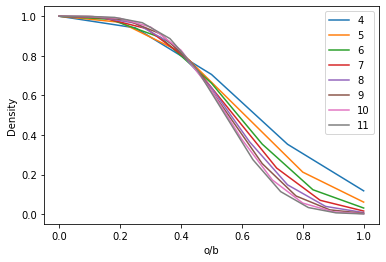

In [24]:
for k, v in Density_Meta.items():
  if k > 3:
    plt.plot(1-np.array(range(len(v)))/k,v,label = k)

plt.legend()
plt.legend()
plt.xlabel("o/b")
plt.ylabel("Density")
plt.savefig('/content/gdrive/My Drive/HomiphilyDensity.pdf')

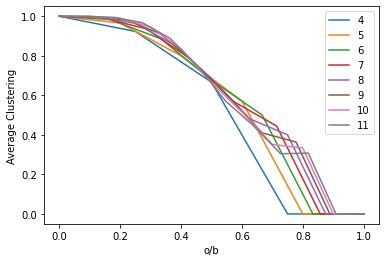

In [25]:
for k, v in Clustering_Meta.items():
  if k > 3:
    plt.plot(1-np.array(range(len(v)))/k,v,label = k)

plt.legend()
plt.legend()
plt.xlabel("o/b")
plt.ylabel("Average Clustering")
plt.savefig('/content/gdrive/My Drive/HomiphilyClustering.pdf')

In [2]:
with open('/content/gdrive/My Drive/homiphilies2', 'rb') as f:
    Density_Meta,Clustering_Meta,path_Meta = pickle.load(f)


Text(0, 0.5, 'Density')

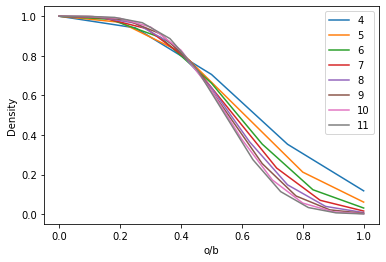

In [21]:
for k, v in Density_Meta.items():
  if k > 3:
    plt.plot(1-np.array(range(len(v)))/k,v,label = k)

plt.legend()
plt.xlabel("o/b")
plt.ylabel("Density")

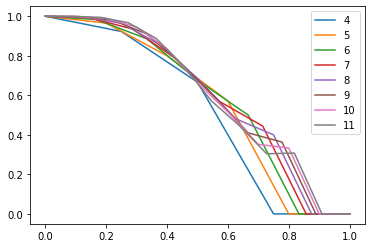

In [18]:
for k, v in Clustering_Meta.items():
  if k > 3:
    plt.plot(1-np.array(range(len(v)))/k,v,label = k)

plt.legend()
plt.xlabel("o/b")
plt.ylabel("Average Clustering")

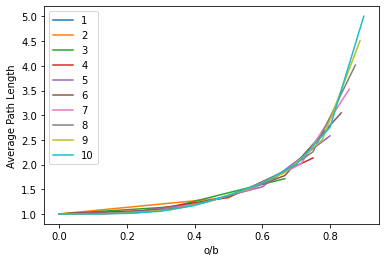

In [26]:
for k, v in path_Meta.items():
    plt.plot(1-np.array(range(1,k+1))/k,np.array(v),label = k)

plt.legend()
plt.xlabel("o/b")
plt.ylabel("Average Path Length")
plt.savefig('/content/gdrive/My Drive/HomiphilyPL.pdf')